Importing libraries

In [ ]:
pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=27d6822222a2b649e5fdcbe7a3b45bcf14eda9c9a806e96add70b51224b68b72
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [ ]:
!pip install prophet

In [ ]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import time
import yfinance as yf
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import plot_plotly
import seaborn as sns
from pandas_datareader.data import DataReader

Importing NVIDIA dataset

In [ ]:
stock1 = 'NVDA'
start1 = '2014-01-01'
end1 = datetime.now()
dataset1 = pd.DataFrame()

new_data1 = yf.download(stock1, start=start1, end=end1, interval='1d')
dataset1 = dataset1.append(new_data1)
start1 = dataset1.index[-1] + timedelta(days=1)
time.sleep(5)
dataset1

[*********************100%%**********************]  1 of 1 completed
<ipython-input-4-2e0800f8dd4c>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset1 = dataset1.append(new_data1)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.980000,3.995000,3.930000,3.965000,3.740547,26009200
2014-01-03,3.972500,3.980000,3.905000,3.917500,3.695736,25933200
2014-01-06,3.957500,4.000000,3.920000,3.970000,3.745264,40949200
2014-01-07,4.010000,4.050000,3.982500,4.035000,3.806584,33328800
2014-01-08,4.050000,4.110000,4.035000,4.090000,3.858470,30819200
...,...,...,...,...,...,...
2024-03-22,911.409973,947.780029,908.340027,942.890015,942.890015,58521500
2024-03-25,939.409973,967.659973,935.099976,950.020020,950.020020,55213600
2024-03-26,958.510010,963.750000,925.020020,925.609985,925.609985,51364800


adding indicators for nvidia dataset

In [ ]:
dataset1['RSI'] = ta.rsi(dataset1.Close, length = 14)
dataset1['EMAF'] = ta.ema(dataset1.Close, length = 20)
dataset1['EMAM'] = ta.ema(dataset1.Close, length = 100)
dataset1['EMAS'] = ta.ema(dataset1.Close, length = 150)

dataset1['Target'] = dataset1['Adj Close']-dataset1.Open
dataset1['Target'] = dataset1['Target'].shift(-1)

dataset1['TargetClass'] = [1 if dataset1.Target[i]>0 else 0 for i in range(len(dataset1))]

dataset1['TargetNextClose'] = dataset1['Adj Close'].shift(-1)

dataset1.dropna(inplace=True)
dataset1.reset_index(inplace = True)
dataset1.drop(['Volume', 'Close'], axis=1, inplace=True)
dataset1 = dataset1.iloc[:, 0:12]
pd.set_option('display.max_columns', None)
dataset1

,Date,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,2014-08-06,4.385000,4.465000,4.352500,4.198390,36.666074,4.530827,4.559292,4.500133,-0.291953,0,4.155548
1,2014-08-07,4.447500,4.487500,4.335000,4.155548,33.995437,4.515034,4.555445,4.498343,-0.032925,0,4.522075
2,2014-08-08,4.555000,4.775000,4.555000,4.522075,60.502166,4.537412,4.559297,4.501677,-0.256725,0,4.498275
3,2014-08-11,4.755000,4.775000,4.712500,4.498275,58.849481,4.555277,4.562579,4.504635,-0.224225,0,4.498275
4,2014-08-12,4.722500,4.750000,4.672500,4.498275,58.849481,4.571441,4.565795,4.507553,-0.208045,0,4.524455
...,...,...,...,...,...,...,...,...,...,...,...,...
2422,2024-03-21,923.000000,926.479980,904.049988,914.349976,67.836402,853.255098,652.287683,589.693487,31.480042,1,942.890015
2423,2024-03-22,911.409973,947.780029,908.340027,942.890015,71.195574,861.791757,658.042185,594.371586,10.610046,1,950.020020
2424,2024-03-25,939.409973,967.659973,935.099976,950.020020,71.982822,870.194449,663.823924,599.082162,-32.900024,0,925.609985
2425,2024-03-26,958.510010,963.750000,925.020020,925.609985,65.393366,875.472119,669.007806,603.407034,-28.619995,0,902.500000


Plotting Features which will be used by the model

<Axes: xlabel='Date'>

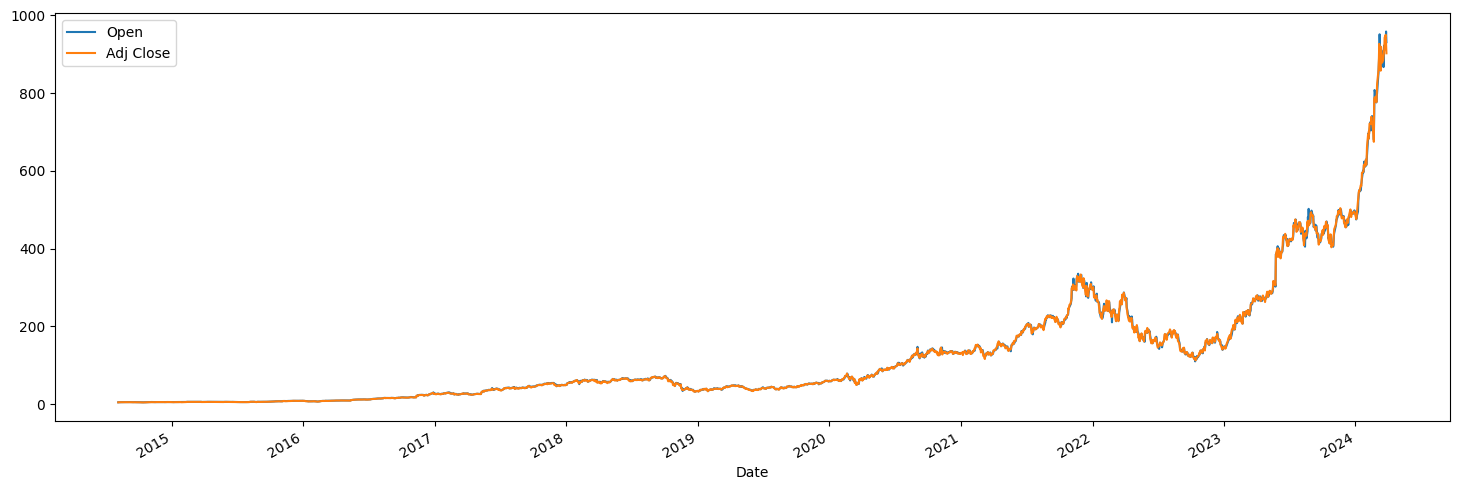

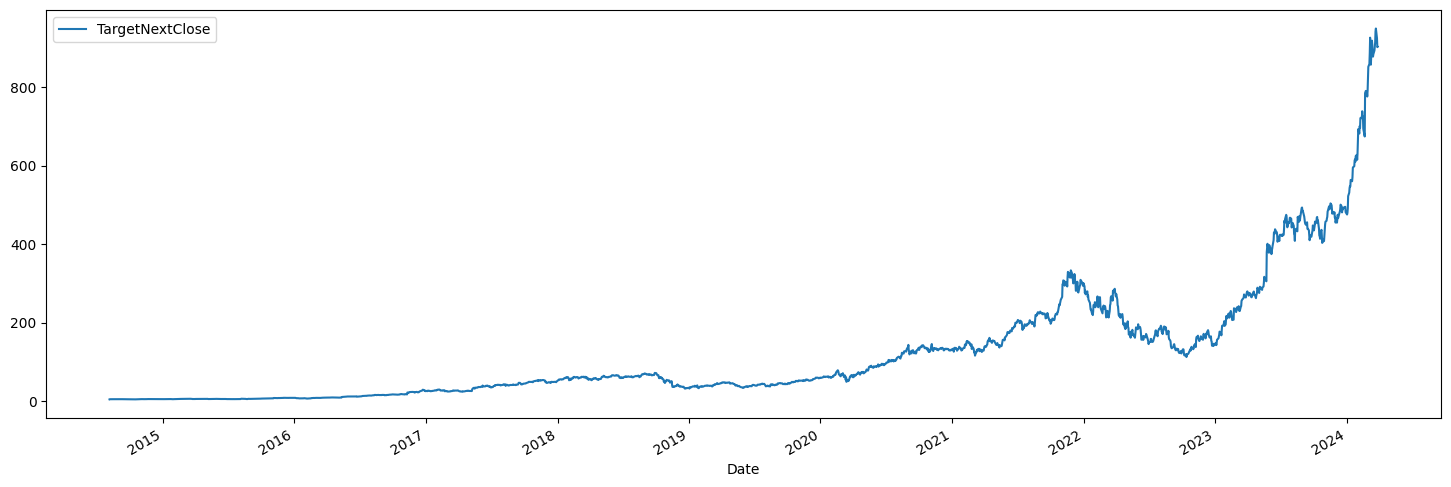

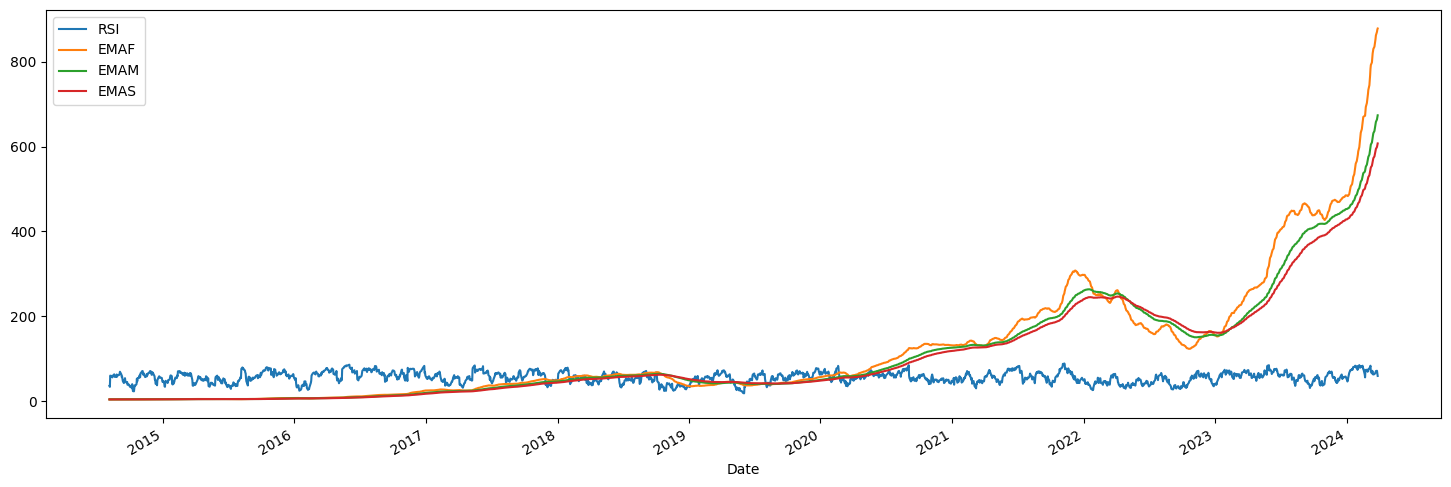

In [ ]:
dataset1.plot(x='Date', y= ['Open', 'Adj Close'], figsize = (18,6))
dataset1.plot(x='Date', y =['TargetNextClose'], figsize = (18,6))
dataset1.plot(x='Date', y =['RSI', 'EMAF', 'EMAM', 'EMAS'], figsize = (18,6))

ML model using prophet

In [ ]:
dataset1.rename(columns={'Date': 'ds', 'TargetNextClose': 'y'}, inplace = True)
df = dataset1[['ds', 'y']]

model = Prophet(daily_seasonality= True)
model.fit(df)

future_df = model.make_future_dataframe(periods=len(df), freq='D')
forecast = model.predict(future_df)
forecast.head(20)
fig = plot_plotly(model, forecast)
fig.update_layout(title='Prophet Model Forecast', xaxis_title='Date', yaxis_title='Price')
fig.update_yaxes(range=[0, 1500])
fig.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwlki0_jn/_ue0cfoi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwlki0_jn/nc1osxzv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96884', 'data', 'file=/tmp/tmpwlki0_jn/_ue0cfoi.json', 'init=/tmp/tmpwlki0_jn/nc1osxzv.json', 'output', 'file=/tmp/tmpwlki0_jn/prophet_modelsbfgs39f/prophet_model-20240401040534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:05:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:05:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-08-06,3.998853,-50.015746,63.496958,3.998853,3.998853,1.340004,1.340004,1.340004,-0.214494,-0.214494,-0.214494,0.188204,0.188204,0.188204,1.366295,1.366295,1.366295,0.0,0.0,0.0,5.338857
1,2014-08-07,4.007205,-49.888904,59.833950,4.007205,4.007205,0.779814,0.779814,0.779814,-0.214494,-0.214494,-0.214494,-0.287255,-0.287255,-0.287255,1.281563,1.281563,1.281563,0.0,0.0,0.0,4.787019
2,2014-08-08,4.015556,-51.934544,60.571870,4.015556,4.015556,1.048409,1.048409,1.048409,-0.214494,-0.214494,-0.214494,0.006995,0.006995,0.006995,1.255908,1.255908,1.255908,0.0,0.0,0.0,5.063965
3,2014-08-11,4.040612,-48.589150,59.736630,4.040612,4.040612,1.621308,1.621308,1.621308,-0.214494,-0.214494,-0.214494,0.327975,0.327975,0.327975,1.507827,1.507827,1.507827,0.0,0.0,0.0,5.661919
4,2014-08-12,4.048963,-55.813437,64.697517,4.048963,4.048963,1.181630,1.181630,1.181630,-0.214494,-0.214494,-0.214494,-0.289541,-0.289541,-0.289541,1.685665,1.685665,1.685665,0.0,0.0,0.0,5.230593
5,2014-08-13,4.057315,-49.001766,62.709705,4.057315,4.057315,1.873070,1.873070,1.873070,-0.214494,-0.214494,-0.214494,0.188204,0.188204,0.188204,1.899360,1.899360,1.899360,0.0,0.0,0.0,5.930385
6,2014-08-14,4.065667,-55.245804,62.906975,4.065667,4.065667,1.638947,1.638947,1.638947,-0.214494,-0.214494,-0.214494,-0.287255,-0.287255,-0.287255,2.140696,2.140696,2.140696,0.0,0.0,0.0,5.704614
7,2014-08-15,4.074019,-47.380190,63.996914,4.074019,4.074019,2.193181,2.193181,2.193181,-0.214494,-0.214494,-0.214494,0.006995,0.006995,0.006995,2.400680,2.400680,2.400680,0.0,0.0,0.0,6.267199
8,2014-08-18,4.099074,-46.322344,63.477864,4.099074,4.099074,3.309116,3.309116,3.309116,-0.214494,-0.214494,-0.214494,0.327975,0.327975,0.327975,3.195635,3.195635,3.195635,0.0,0.0,0.0,7.408190
9,2014-08-19,4.107426,-49.249202,61.821039,4.107426,4.107426,2.928610,2.928610,2.928610,-0.214494,-0.214494,-0.214494,-0.289541,-0.289541,-0.289541,3.432645,3.432645,3.432645,0.0,0.0,0.0,7.036035


Plotting the graph

In [ ]:
fig = plot_plotly(model, forecast)
fig.update_layout(title='Prophet Model Forecast', xaxis_title='Date', yaxis_title='Price')
fig.update_yaxes(range=[0, 1500])
fig.show()

In [ ]:
from keras.models import save_model

# Assuming 'model' is your trained Keras model
model.save('C:/Users/91820/Downloads/Streamlit/modelp.h5')

LSTM


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

#For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

#For time stamps
from datetime import datetime

In [ ]:
df = pdr.get_data_yahoo('GOOG',start='2012-01-01',end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2024-04-17,157.190002,158.681000,156.134995,156.880005,156.880005,16237800
2024-04-18,156.925003,158.485001,156.210007,157.460007,157.460007,14016100
2024-04-19,157.750000,157.990005,153.910004,155.720001,155.720001,20063900


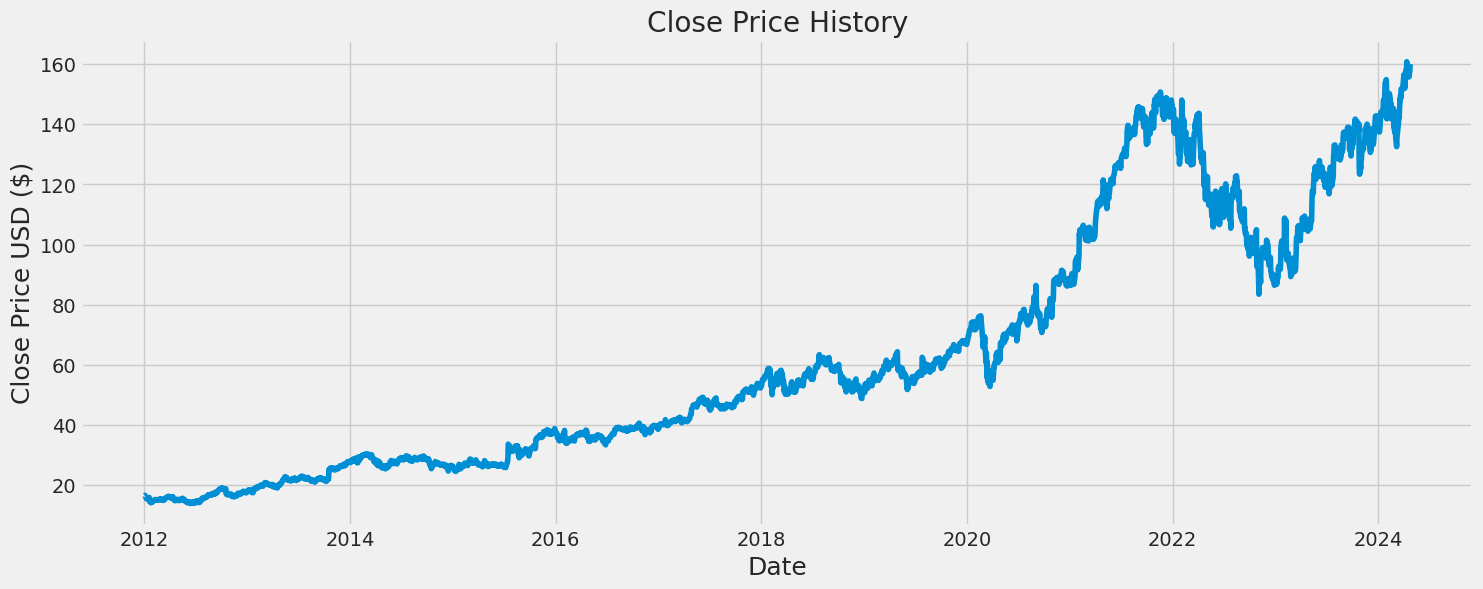

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset)*.95))

training_data_len

2942

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01803734],
       [0.01852405],
       [0.01695198],
       ...,
       [0.96547877],
       [0.98066266],
       [0.99445081]])

In [ ]:
train_data = scaled_data[0:int(training_data_len),:]
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

[array([0.01803734, 0.01852405, 0.01695198, 0.01542739, 0.01075355,
       0.01086887, 0.01134711, 0.01197119, 0.01118261, 0.01179143,
       0.01252575, 0.01365519, 0.00456869, 0.00448898, 0.00371058,
       0.0017705 , 0.00153477, 0.00354947, 0.00316111, 0.00357152,
       0.00369362, 0.00441945, 0.00632223, 0.00848617, 0.00809272,
       0.00861505, 0.00888809, 0.00794688, 0.00901358, 0.00859979,
       0.00788752, 0.00805033, 0.0077315 , 0.00931884, 0.00829114,
       0.00798079, 0.00862353, 0.00852348, 0.01006333, 0.01003959,
       0.01074338, 0.01054835, 0.00936124, 0.00778577, 0.00809781,
       0.00815548, 0.00698702, 0.00781799, 0.00995988, 0.00965633,
       0.01052801, 0.01119109, 0.0127072 , 0.0126241 , 0.01372473,
       0.01475412, 0.01416735, 0.01531037, 0.01491863, 0.01640082])]
[0.015154354386303165]

[array([0.01803734, 0.01852405, 0.01695198, 0.01542739, 0.01075355,
       0.01086887, 0.01134711, 0.01197119, 0.01118261, 0.01179143,
       0.01252575, 0.01365519, 0.0

In [ ]:
x_train.shape

(2882, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(x_train,y_train,batch_size=1,epochs=1)

2882/2882 [==============================] - 191s 64ms/step - loss: 0.0015


In [ ]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

5/5 [==============================] - 1s 38ms/step


6.925957632577846

<ipython-input-13-aa3abce344bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


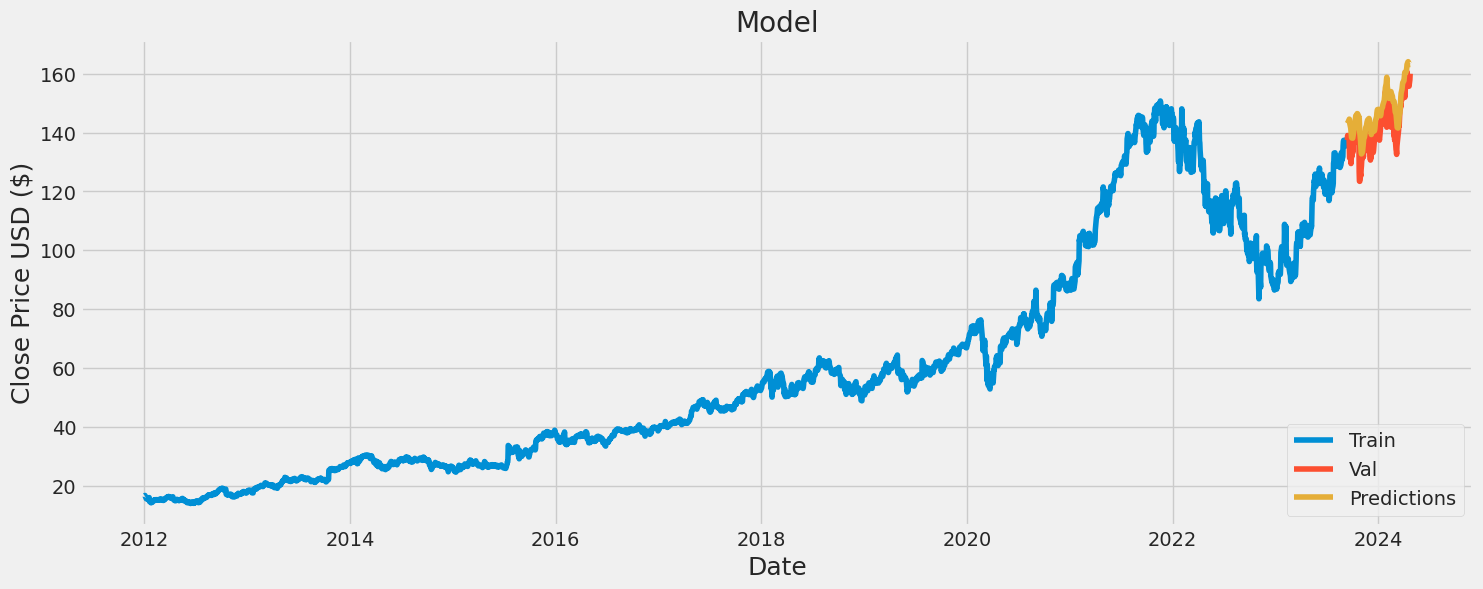

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()